In [15]:
import pandas as pd
import geopandas as gpd
import pylab as plt
import os
import seaborn as sns
import datetime as dt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [16]:
pth = '/Users/nicholasjones/Desktop/code/data/FB/India/v2'

In [17]:
df = pd.read_csv('/Users/nicholasjones/Desktop/code/wbg-location-data/notebooks/nick/df_india_may9.csv')

#### 1. Data imports
* Facebook data
* GADM polygons
* income data (Net State Domestic Product per capita)

In [18]:
df.ds = pd.to_datetime(df.ds)

In [19]:
df = df.set_index('ds', drop=True)

In [20]:
df.polygon_name.unique()

array(['Goa', 'Andaman and Nicobar', 'Uttar Pradesh', 'Mizoram',
       'NCT of Delhi', 'West Bengal', 'Manipur', 'Punjab', 'Chhattisgarh',
       'Uttarakhand', 'Jammu and Kashmir', 'Madhya Pradesh', 'Rajasthan',
       'Tripura', 'Bihar', 'Tamil Nadu', 'Jharkhand', 'Sikkim',
       'Lakshadweep', 'Telangana', 'Haryana', 'Assam', 'Maharashtra',
       'Puducherry', 'Dadra and Nagar Haveli', 'Meghalaya', 'Gujarat',
       'Kerala', 'Himachal Pradesh', 'Odisha', 'Nagaland',
       'Arunachal Pradesh', 'Daman and Diu', 'Andhra Pradesh',
       'Chandigarh', 'Karnataka'], dtype=object)

In [21]:
df.head()

,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users
ds,,,
2020-03-01,Goa,-0.075691,0.125432
2020-03-01,Andaman and Nicobar,-0.184049,0.217122
2020-03-01,Uttar Pradesh,-0.066091,0.139678
2020-03-01,Mizoram,0.017650,0.175495
2020-03-01,NCT of Delhi,-0.135109,0.187128


In [23]:
@interact(state = sorted(df.polygon_name.unique()))
def plot_chart(state):
    f, ax = plt.subplots(figsize = [9,9])
    for background_state in df.polygon_name.unique():
        sns.lineplot(x=df.index[df.polygon_name == background_state], y=df["all_day_ratio_single_tile_users"][df.polygon_name == background_state], color = 'grey', alpha = 0.3, linewidth = 1)
    ax = sns.lineplot(x=df.index[df.polygon_name == state], y="all_day_ratio_single_tile_users", hue = 'polygon_name', color = 'orange',data=df[df.polygon_name == state], linewidth = 4)
    plt.axvline(dt.datetime(2020, 3, 22),linestyle='--', alpha = 0.5)
    plt.axvline(dt.datetime(2020, 3, 24),linestyle='--', alpha = 0.5)
    plt.title('Percent users remaining in home grid cell all day', fontsize = 16);

interactive(children=(Dropdown(description='state', options=('Andaman and Nicobar', 'Andhra Pradesh', 'Arunach…

In [24]:
@interact(state = sorted(df.polygon_name.unique()))
def plot_chart(state):
    f, ax = plt.subplots(figsize = [9,9])
    for background_state in df.polygon_name.unique():
        sns.lineplot(x=df.index[df.polygon_name == background_state], y=df["all_day_bing_tiles_visited_relative_change"][df.polygon_name == background_state], color = 'grey', alpha = 0.3, linewidth = 1)
    ax = sns.lineplot(x=df.index[df.polygon_name == state], y="all_day_bing_tiles_visited_relative_change", hue = 'polygon_name', color = 'orange',data=df[df.polygon_name == state], linewidth = 4)
    plt.axvline(dt.datetime(2020, 3, 22),linestyle='--', alpha = 0.5)
    plt.axvline(dt.datetime(2020, 3, 24),linestyle='--', alpha = 0.5)
    plt.title('Change in mobility compared with baseline period (number of grid cells visited daily)', fontsize = 16);

interactive(children=(Dropdown(description='state', options=('Andaman and Nicobar', 'Andhra Pradesh', 'Arunach…

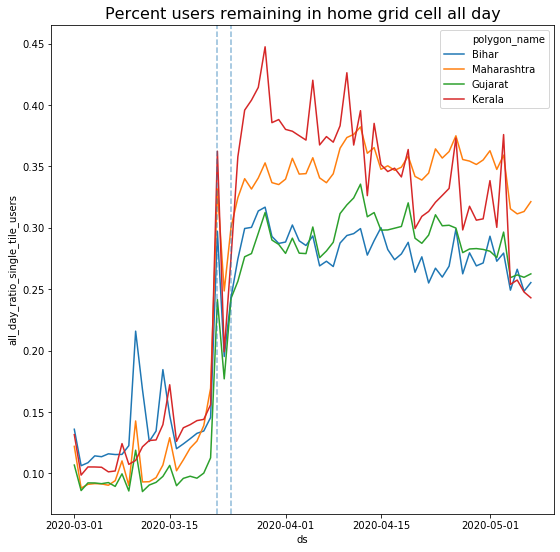

In [94]:
states = ['Gujarat','Kerala','Maharashtra','Bihar']
f, ax = plt.subplots(figsize = [9,9])
ax = sns.lineplot(x=df.index[df.polygon_name.isin(states)], y="all_day_ratio_single_tile_users", hue = 'polygon_name', data=df[df.polygon_name.isin(states)])
plt.axvline(dt.datetime(2020, 3, 22),linestyle='--', alpha = 0.5)
plt.axvline(dt.datetime(2020, 3, 24),linestyle='--', alpha = 0.5)
plt.title('Percent users remaining in home grid cell all day', fontsize = 16);

In [25]:
def plot_chart(state):
    f, ax = plt.subplots(figsize = [9,9])
    for background_state in df.polygon_name.unique():
        sns.lineplot(x=df.index[df.polygon_name == background_state], y=df["all_day_bing_tiles_visited_relative_change"][df.polygon_name == background_state], color = 'grey', alpha = 0.3, linewidth = 1)
    ax = sns.lineplot(x=df.index[df.polygon_name == state], y="all_day_bing_tiles_visited_relative_change", hue = 'polygon_name', color = 'orange',data=df[df.polygon_name == state], linewidth = 4)
    plt.axvline(dt.datetime(2020, 3, 22),linestyle='--', alpha = 0.5)
    plt.axvline(dt.datetime(2020, 3, 24),linestyle='--', alpha = 0.5)
    plt.title('Change in mobility compared with baseline period (number of grid cells visited daily)', fontsize = 16);

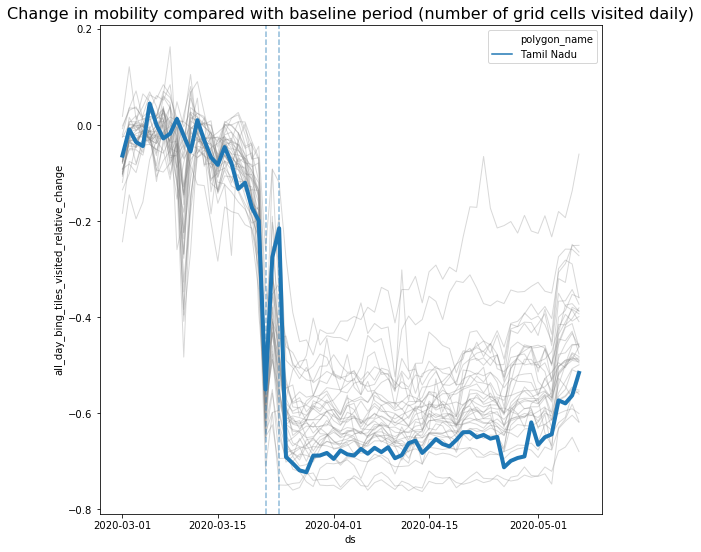

In [26]:
plot_chart('Tamil Nadu')